# Examen EDA

Forest Covertype data (https://archive.ics.uci.edu/ml/datasets/Covertype )es un conjunto de datos cargado en la librería sklearn que permite realizar un ejercicio tipo problemas de clasificación. El objetivo de este dataset es estudiar las variables cartográficas para poder predecir el tipo de cubierta forestal. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del Servicio Forestal de EE.UU. (USFS).

Los datos están en forma cruda (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan bosques con mínimas perturbaciones causadas por el hombre, por lo que los tipos de cubierta forestal existentes son más el resultado de procesos ecológicos, que de prácticas de gestión forestal.

#### Importamos las bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler


#### Leemos el dataset

In [2]:
print("Cargando el conjunto de datos...")
df = pd.read_csv('covtype.data', header=None)
print("Conjunto de datos cargado.\n")

Cargando el conjunto de datos...
Conjunto de datos cargado.



C:\Users\Claudia\AppData\Local\Temp\ipykernel_11716\2737760931.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('covtype.data', header=None)


#### Asignamos nombres a las columnas

In [3]:
print("Asignando nombres a las columnas...")
basic_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
              'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
              'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
              'Horizontal_Distance_To_Fire_Points']

wilderness_cols = ['Wilderness_Area_' + str(i) for i in range(1, 5)]
soil_cols = ['Soil_Type_' + str(i) for i in range(1, 41)]

all_cols = basic_cols + wilderness_cols + soil_cols + ['Cover_Type']
df.columns = all_cols
print("Nombres de columnas asignados.\n")

Asignando nombres a las columnas...
Nombres de columnas asignados.



#### Preprocesamos las columnas Wilderness_Area y Soil_Type

In [4]:
print("Preprocesando las columnas Wilderness_Area y Soil_Type...")
df['Wilderness_Area'] = df[wilderness_cols].max(axis=1)
df.drop(wilderness_cols, axis=1, inplace=True)

df['Soil_Type'] = df[soil_cols].max(axis=1)
df.drop(soil_cols, axis=1, inplace=True)
print("Preprocesamiento completado.\n")

Preprocesando las columnas Wilderness_Area y Soil_Type...
Preprocesamiento completado.



#### Verificamos el contenido de nuestro DataFrame

In [5]:
print("Información del DataFrame:")
print(df.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581013 entries, 0 to 581012
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581013 non-null  object
 1   Aspect                              581013 non-null  object
 2   Slope                               581013 non-null  object
 3   Horizontal_Distance_To_Hydrology    581013 non-null  object
 4   Vertical_Distance_To_Hydrology      581013 non-null  object
 5   Horizontal_Distance_To_Roadways     581013 non-null  object
 6   Hillshade_9am                       581013 non-null  object
 7   Hillshade_Noon                      581013 non-null  object
 8   Hillshade_3pm                       581013 non-null  object
 9   Horizontal_Distance_To_Fire_Points  581013 non-null  object
 10  Cover_Type                          581013 non-null  object
 11  Wilderness_A

#### Verificamos si hay valores nulos

In [6]:
print("\nVerificando si hay valores nulos...")
nulos = df.isna().sum()
print("Número de valores nulos en cada columna:\n", nulos)


Verificando si hay valores nulos...
Número de valores nulos en cada columna:
 Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
Wilderness_Area                       0
Soil_Type                             0
dtype: int64


#### Verificamos si hay filas duplicadas

In [7]:
print("\nVerificando si hay filas duplicadas...")
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f'Total de filas duplicadas: {duplicate_count}')
else:
    print('No se encuentran filas duplicadas.')


Verificando si hay filas duplicadas...
No se encuentran filas duplicadas.


### Ejercicio 1

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante las importancias de cada variable (Decision Trees Importances):

Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
random_state=100

In [8]:
df_f1 = df.copy()

In [9]:
target = 'Cover_Type'
features = [x for x in df_f1.columns if x!=target]
arbol = DecisionTreeRegressor(random_state=100)

In [10]:
df_f1 = df.copy()
df_f1['Cover_Type'] = pd.factorize(df_f1['Cover_Type'])[0]


In [11]:
for col in features:
    df_f1[col] = pd.to_numeric(df_f1[col], errors='coerce')

df_f1.fillna(0, inplace=True)

arbol.fit(X=df_f1[features], y=df_f1[target])


DecisionTreeRegressor(random_state=100)

### Variables importantes

In [12]:
importancias = arbol.feature_importances_

In [13]:
df_importancia = pd.DataFrame(arbol.feature_importances_, index=features, columns=["Importancia"])

df_importancia.sort_values(by=df_importancia.columns[0], ascending=False, inplace=True) #ORDENAR DATA FRAME: DECRECIENTE

df_importancia.head(10)

,Importancia
Elevation,0.350242
Horizontal_Distance_To_Fire_Points,0.153900
Horizontal_Distance_To_Roadways,0.124187
Vertical_Distance_To_Hydrology,0.070369
Horizontal_Distance_To_Hydrology,0.067988
Aspect,0.054868
Hillshade_9am,0.049818
Hillshade_Noon,0.047782
Hillshade_3pm,0.044413
Slope,0.036433


In [14]:
df_importancia["imp_acum"] = df_importancia["Importancia"].cumsum()
df_importancia

,Importancia,imp_acum
Elevation,0.350242,0.350242
Horizontal_Distance_To_Fire_Points,0.153900,0.504142
Horizontal_Distance_To_Roadways,0.124187,0.628329
Vertical_Distance_To_Hydrology,0.070369,0.698698
Horizontal_Distance_To_Hydrology,0.067988,0.766686
Aspect,0.054868,0.821553
Hillshade_9am,0.049818,0.871372
Hillshade_Noon,0.047782,0.919154
Hillshade_3pm,0.044413,0.963567
Slope,0.036433,1.000000


In [15]:
df_importancia.loc[df_importancia['imp_acum']<=0.95]

,Importancia,imp_acum
Elevation,0.350242,0.350242
Horizontal_Distance_To_Fire_Points,0.153900,0.504142
Horizontal_Distance_To_Roadways,0.124187,0.628329
Vertical_Distance_To_Hydrology,0.070369,0.698698
Horizontal_Distance_To_Hydrology,0.067988,0.766686
Aspect,0.054868,0.821553
Hillshade_9am,0.049818,0.871372
Hillshade_Noon,0.047782,0.919154


In [16]:
variables = df_importancia.loc[df_importancia['imp_acum']>0.95].index
variables = list(variables)
print('Variables no importantes: ',variables)
print('Total de variables tras la eliminación: ',len(features) - len(variables) + 1)

Variables no importantes:  ['Hillshade_3pm', 'Slope', 'Wilderness_Area', 'Soil_Type']
Total de variables tras la eliminación:  9


In [19]:
df_f2 = df_f1.drop(labels=variables, axis='columns')
df_f2.head()

,Elevation,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Cover_Type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2596.0,51.0,258.0,0.0,510.0,221.0,232.0,6279.0,1
2,2590.0,56.0,212.0,-6.0,390.0,220.0,235.0,6225.0,1
3,2804.0,139.0,268.0,65.0,3180.0,234.0,238.0,6121.0,2
4,2785.0,155.0,242.0,118.0,3090.0,238.0,238.0,6211.0,2


Ejercicio 2

Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas.:

2.1 Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

2.2 Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

LLevar las variables de entrada a una escala de 0 a 1
Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

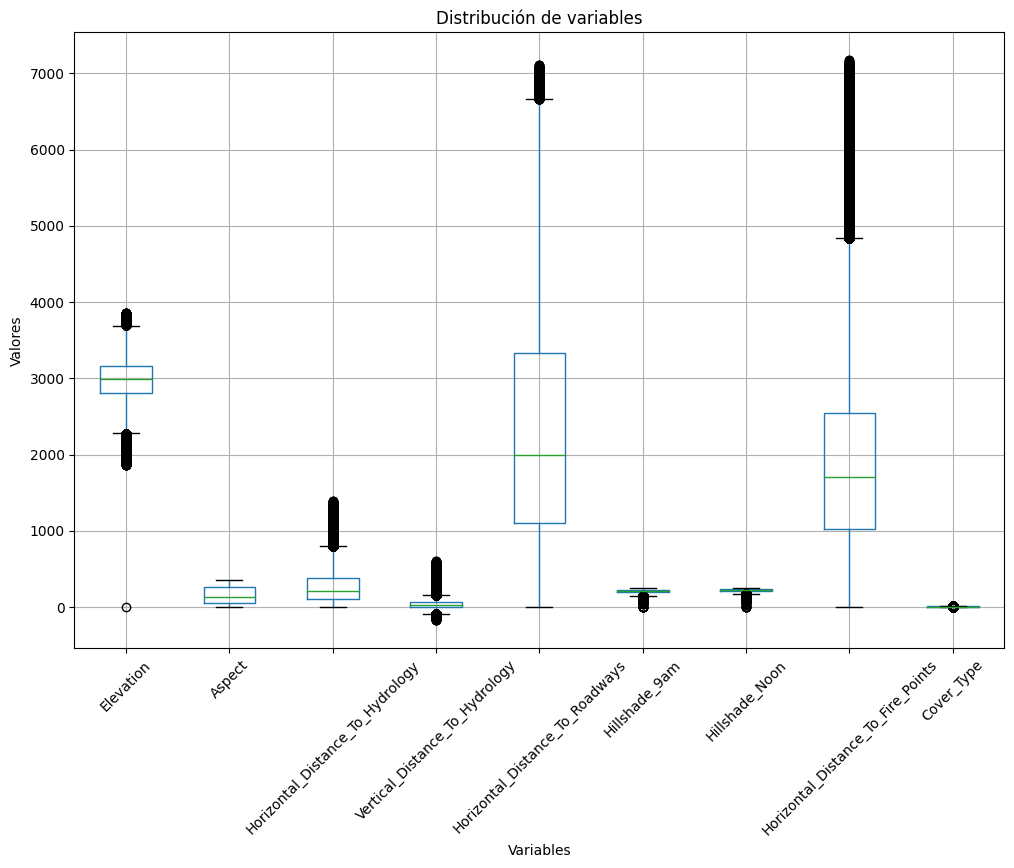

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df_f2.boxplot()
plt.xticks(rotation=45)
plt.title('Distribución de variables')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()


In [20]:
scaler = MinMaxScaler()
df_selected_scaled = pd.DataFrame(scaler.fit_transform(df_f2),
                                   columns=df_f2.columns)

df_selected_scaled['Cover_Type'] = pd.factorize(df_f2['Cover_Type'])[0]

df_selected_scaled.head()






,Elevation,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Cover_Type
0,0.000000,0.000000,0.000000,0.223514,0.000000,0.000000,0.000000,0.000000,0
1,0.672888,0.141667,0.184681,0.223514,0.071659,0.870079,0.913386,0.875366,1
2,0.671332,0.155556,0.151754,0.215762,0.054798,0.866142,0.925197,0.867838,1
3,0.726801,0.386111,0.191840,0.307494,0.446817,0.921260,0.937008,0.853339,2
4,0.721877,0.430556,0.173228,0.375969,0.434172,0.937008,0.937008,0.865886,2


Ejercicio 3

Después de estandarizar los datos procedemos a crear el primer clasificador:

3.1 Divide el datset en training y en test:

Guarda el 20% de los datos para testeo.
random_state=100
3.2 Entrena un modelo de regresión logística:

Número máximo de iteraciones igual a 1000
random_state=100
3.3 Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.

Accuracy
F1-score (average='weighted')
Classification report (zero_division=0)
Confusion matrix

In [22]:
from sklearn.model_selection import train_test_split

X = df_selected_scaled.drop('Cover_Type', axis=1)
y = df_selected_scaled['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=100)
logreg.fit(X_train, y_train)


C:\Users\Claudia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=100)

In [24]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-score (average='weighted'):", f1)
print("Classification Report:\n", classification)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.6769360515649337
F1-score (average='weighted'): 0.6490305371739692
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00       452
           2       0.00      0.00      0.00       610
           3       0.00      0.00      0.00       457
           4       0.00      0.00      0.00       443
           5       0.00      0.00      0.00       444
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       461
           8       0.71      0.79      0.75     55836
           9       0.66      0.70      0.68     42096
          10       0.00      0.00      0.00      1407
          11       0.51      0.12      0.20      3719
          12       0.56      0.67      0.61      6737
          13       0.23      0.04      0.07      3005
          14       0.00      0.00      0.00       130

    accuracy                   

Ejercicio 4

Ahora probamos la creación de otros modelo basados en árboles de decisión:

4.1 Entrena un modelo tipo Decision Tree Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:

random_state=100
Accuracy
F1-score (average='weighted')
Classification report (zero_division=0)
4.2 Saca la curva de complejidad del modelo Decision Tree (Model Complexity Curve) y crea un nuevo clasificador con el valor óptimo de la profundidad del árbol según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.

random_state=100
rango de profundidades: de 2 a 30 inclusive

4.3 Saca la gráfica de el Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

random_state=100
(Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
classification_dt = classification_report(y_test, y_pred_dt, zero_division=0)

print("Accuracy Decision Tree:", accuracy_dt)
print("F1-score Decision Tree (average='weighted'):", f1_dt)
print("Classification Report Decision Tree:\n", classification_dt)


Accuracy Decision Tree: 0.8804764076658951
F1-score Decision Tree (average='weighted'): 0.8819443920726127
Classification Report Decision Tree:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.21      0.21      0.21       452
           2       0.21      0.25      0.23       610
           3       0.05      0.07      0.06       457
           4       0.10      0.11      0.10       443
           5       0.06      0.07      0.06       444
           6       0.12      0.14      0.13       405
           7       0.65      0.66      0.65       461
           8       0.93      0.92      0.93     55836
           9       0.91      0.91      0.91     42096
          10       0.58      0.57      0.58      1407
          11       0.83      0.81      0.82      3719
          12       0.85      0.83      0.84      6737
          13       0.72      0.71      0.72      3005
          14       0.23      0.23      0.23 

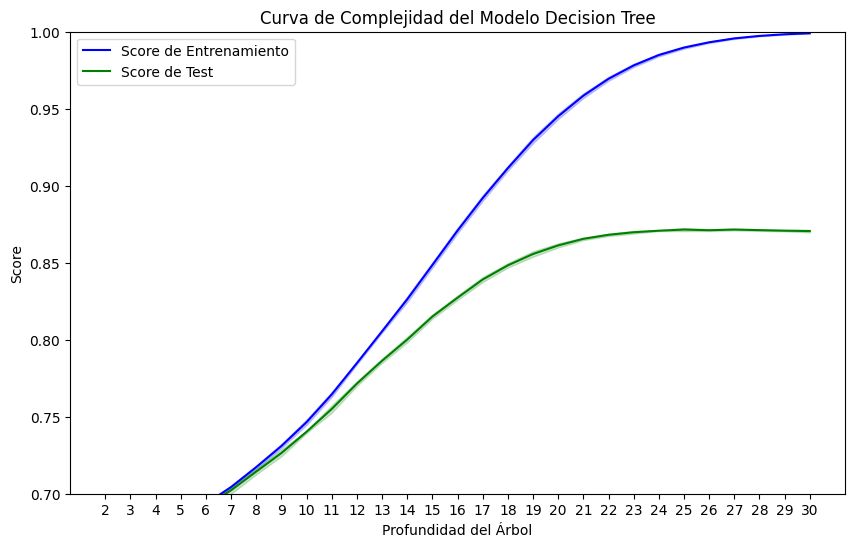

Profundidad óptima del árbol: 27


In [26]:
from sklearn.model_selection import validation_curve

depth_range = range(2, 31)

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=100), X_train, y_train,
    param_name="max_depth", param_range=depth_range, cv=5,
    scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# grafico
plt.figure(figsize=(10, 6))
plt.title("Curva de Complejidad del Modelo Decision Tree")
plt.xlabel("Profundidad del Árbol")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.xticks(depth_range)
plt.plot(depth_range, train_scores_mean, label="Score de Entrenamiento", color="b")
plt.plot(depth_range, test_scores_mean, label="Score de Test", color="g")
plt.fill_between(depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.fill_between(depth_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

# Obtener la profundidad óptima
optimal_depth = depth_range[np.argmax(test_scores_mean)]
print("Profundidad óptima del árbol:", optimal_depth)


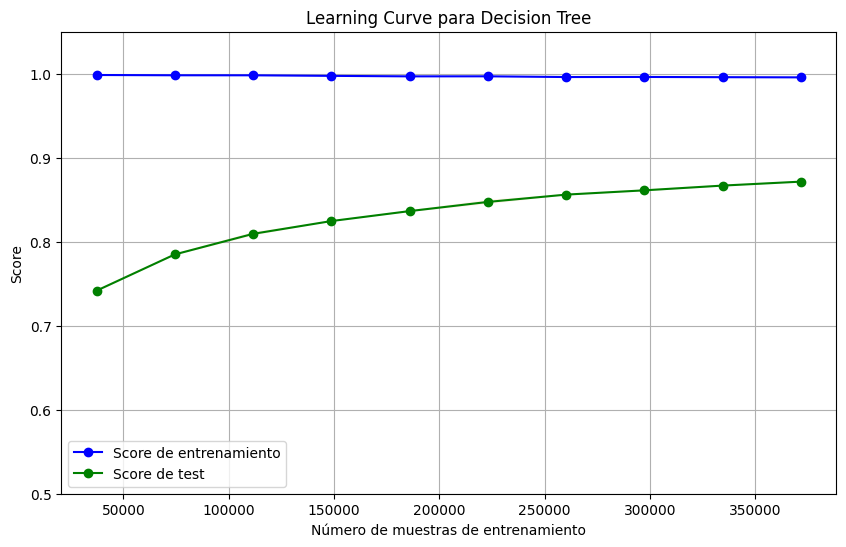

In [27]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Número de muestras de entrenamiento")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Score de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de test")

    plt.legend(loc="best")
    return plt

# Crear el clasificador con la profundidad óptima
optimal_dt = DecisionTreeClassifier(max_depth=optimal_depth, random_state=100)

# Dibujar la Learning Curve
plot_learning_curve(optimal_dt, "Learning Curve para Decision Tree", X_train, y_train, ylim=(0.5, 1.05), cv=5, n_jobs=-1)

plt.show()

Ejercicio 5

Ahora probamos la creación de otros modelo basados en bosques aleatorios:

5.1 Entrena un modelo tipo Random Forest Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:

random_state=100

5.2 Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

5.3 Saca las curvas de complejidad del modelo Random Forest (Model Complexity Curve) y crea un nuevo clasificador con los valores óptimos analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.

random_state=100
define un rango con funciones de numpy para considerar estos números de árboles: [200, 250, 300, 350, 400]
rango de profundidades: de 20 a 40 inclusive en pasos de 2 en 2.
considera estas opciones para max_features : ["auto", "log2", None]
Accuracy
F1-score (average='weighted')
Classification report (zero_division=0)
OOB (out-of-bag score)

5.4 Saca la gráfica del Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

random_state=100
(Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento del modelo Random Forest Classifier
rf = RandomForestClassifier(random_state=100)
rf.fit(X_train, y_train)

# Predicciones en el conjunto de test
y_pred_rf = rf.predict(X_test)

# Cálculo de métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
classification_rf = classification_report(y_test, y_pred_rf, zero_division=0)

# Mostrar las métricas
print("Accuracy Random Forest:", accuracy_rf)
print("F1-score Random Forest (average='weighted'):", f1_rf)
print("Classification Report Random Forest:\n", classification_rf)


Accuracy Random Forest: 0.9291670610913659
F1-score Random Forest (average='weighted'): 0.9199014696842794
Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.32      0.08      0.13       452
           2       0.93      0.24      0.39       610
           3       0.81      0.05      0.09       457
           4       0.14      0.01      0.02       443
           5       0.00      0.00      0.00       444
           6       0.05      0.00      0.01       405
           7       0.71      0.81      0.76       461
           8       0.94      0.97      0.96     55836
           9       0.95      0.95      0.95     42096
          10       0.73      0.61      0.66      1407
          11       0.88      0.91      0.90      3719
          12       0.88      0.95      0.91      6737
          13       0.83      0.85      0.84      3005
          14       0.25      0.04      0.07 

In [29]:
# Obtener la profundidad de los árboles del bosque
depths = [estimator.get_depth() for estimator in rf.estimators_]
median_depth = np.median(depths)

print("Mediana de la profundidad de los árboles del bosque:", median_depth)


Mediana de la profundidad de los árboles del bosque: 40.0


In [33]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definir rangos de hiperparámetros
param_grid = {
    'n_estimators': [200, 250, 300, 350, 400],
    'max_depth': np.arange(20, 41, 2),
    'max_features': ["auto", "log2", None]
}

In [34]:
# Realizar GridSearchCV para encontrar los hiperparámetros óptimos
grid_search = GridSearchCV(RandomForestClassifier(random_state=100), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
optimal_rf = RandomForestClassifier(random_state=100, **best_params)

In [ ]:
# Entrenar el modelo con los hiperparámetros óptimos
optimal_rf.fit(X_train, y_train)

In [ ]:
# Predicciones en el conjunto de test
y_pred_optimal = optimal_rf.predict(X_test)

In [ ]:
# Cálculo de métricas de evaluación
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal, average='weighted')
classification_optimal = classification_report(y_test, y_pred_optimal, zero_division=0)
oob_score_optimal = optimal_rf.oob_score_

In [ ]:
# Mostrar las métricas
print("Accuracy Random Forest (Optimal):", accuracy_optimal)
print("F1-score Random Forest (Optimal, average='weighted'):", f1_optimal)
print("Classification Report Random Forest (Optimal):\n", classification_optimal)
print("OOB Score Random Forest (Optimal):", oob_score_optimal)

Ejercicio 6

Ahora probamos la creación de otros modelo basados en Gradient Boosting:

18.6.1 Entrena un modelo tipo XGBoost Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:

random_state=100

6.2 Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

6.3 Saca las curvas de complejidad del modelo XGBClassifier (Model Complexity Curve) y crea un nuevo clasificador con los valores óptimos analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.

random_state=100
define un rango con funciones de numpy para considerar estos números de árboles: [100, 200, 300, 400, 500]
rango de profundidades: de 6 a 20 inclusive en pasos de 2 en 2.
valores a considerar para el learning_rate: [0.01, 0.1, 0.3, 0.5]
Accuracy
F1-score (average='weighted')
Classification report (zero_division=0)


6.4 Saca la gráfica del Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

random_state=100
(Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)

In [ ]:
import xgboost as xgb 

# Entrenamiento del modelo XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)


In [ ]:
# Predicciones en el conjunto de test
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Cálculo de métricas de evaluación
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
classification_xgb = classification_report(y_test, y_pred_xgb, zero_division=0)

In [ ]:
# Mostrar las métricas
print("Accuracy XGBoost Classifier:", accuracy_xgb)
print("F1-score XGBoost Classifier (average='weighted'):", f1_xgb)
print("Classification Report XGBoost Classifier:\n", classification_xgb)

In [ ]:
# Obtener el número de árboles y la profundidad máxima del modelo XGBoost
num_trees = xgb_model.get_booster().best_iteration
max_depth_xgb = xgb_model.get_booster().max_depth

print("Número de árboles del modelo XGBoost:", num_trees)
print("Profundidad máxima de los árboles del modelo XGBoost:", max_depth_xgb)


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Definir rangos de hiperparámetros
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': np.arange(6, 21, 2),
    'learning_rate': [0.01, 0.1, 0.3, 0.5]
}

In [ ]:
# Realizar GridSearchCV para encontrar los hiperparámetros óptimos
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(random_state=100), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)



In [ ]:
# Obtener los mejores hiperparámetros
best_params_xgb = grid_search_xgb.best_params_
optimal_xgb = xgb.XGBClassifier(random_state=100, **best_params_xgb)


In [ ]:
# Entrenar el modelo con los hiperparámetros óptimos
optimal_xgb.fit(X_train, y_train)

# Predicciones en el conjunto de test
y_pred_optimal_xgb = optimal_xgb.predict(X_test)

# Cálculo de métricas de evaluación
accuracy_optimal_xgb = accuracy_score(y_test, y_pred_optimal_xgb)
f1_optimal_xgb = f1_score(y_test, y_pred_optimal_xgb, average='weighted')
classification_optimal_xgb = classification_report(y_test, y_pred_optimal_xgb, zero_division=0)

In [ ]:
# Mostrar las métricas
print("Accuracy XGBoost Classifier (Optimal):", accuracy_optimal_xgb)
print("F1-score XGBoost Classifier (Optimal, average='weighted'):", f1_optimal_xgb)
print("Classification Report XGBoost Classifier (Optimal):\n", classification_optimal_xgb)

# Obtener los valores de los hiperparámetros óptimos
optimal_n_estimators = best_params_xgb['n_estimators']
optimal_max_depth = best_params_xgb['max_depth']
optimal_learning_rate = best_params_xgb['learning_rate']

In [ ]:
# Crear la curva de complejidad para el número de árboles
plt.figure(figsize=(10, 6))
plt.title("Curva de Complejidad del Modelo XGBoost (Número de Árboles)")
plt.xlabel("Número de Árboles")
plt.ylabel("Score")
plt.xticks(param_grid_xgb['n_estimators'])
plt.plot(param_grid_xgb['n_estimators'], grid_search_xgb.cv_results_['mean_test_score'])
plt.show()

In [ ]:
# Crear la curva de complejidad para la profundidad máxima
plt.figure(figsize=(10, 6))
plt.title("Curva de Complejidad del Modelo XGBoost (Profundidad Máxima)")
plt.xlabel("Profundidad Máxima")
plt.ylabel("Score")
plt.xticks(param_grid_xgb['max_depth'])
plt.plot(param_grid_xgb['max_depth'], grid_search_xgb.cv_results_['mean_test_score'])
plt.show()

In [ ]:
# Crear la curva de complejidad para el learning rate
plt.figure(figsize=(10, 6))
plt.title("Curva de Complejidad del Modelo XGBoost (Learning Rate)")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.xticks(np.arange(len(param_grid_xgb['learning_rate'])), param_grid_xgb['learning_rate'])
plt.plot(range(len(param_grid_xgb['learning_rate'])), grid_search_xgb.cv_results_['mean_test_score'])
plt.show()

Ejercicio 7

Ahora probamos la creación de otros modelos basados en métodos Bayesianos:

7.1 Entrena un modelo para cada tipo de algoritmos Bayesianos y calcula las métricas correspondientes para analizar sus rendimientos en comparación con los modelos anteriores:

GaussianNB
MultinomialNB
ComplementNB
BernoulliNB
Accuracy
F1-score (average='weighted')
Classification report (zero_division=0)

7.2 Saca la gráfica del Learning Curve para el modelo GaussianNB y explica si este modelo sufre de un posible "Overfitting" o "Underfitting" comparando con modelos anteriores.

random_state=100
(Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)

In [32]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

# Entrenar modelos Bayesiano
gaussian_nb = GaussianNB()
multinomial_nb = MultinomialNB()
complement_nb = ComplementNB()
bernoulli_nb = BernoulliNB()

# Entrenar modelos Bayesiano
gaussian_nb.fit(X_train, y_train)
multinomial_nb.fit(X_train, y_train)
complement_nb.fit(X_train, y_train)
bernoulli_nb.fit(X_train, y_train)

# Predicciones en el conjunto de test
y_pred_gaussian_nb = gaussian_nb.predict(X_test)
y_pred_multinomial_nb = multinomial_nb.predict(X_test)
y_pred_complement_nb = complement_nb.predict(X_test)
y_pred_bernoulli_nb = bernoulli_nb.predict(X_test)

# Cálculo de métricas de evaluación para GaussianNB
accuracy_gaussian_nb = accuracy_score(y_test, y_pred_gaussian_nb)
f1_gaussian_nb = f1_score(y_test, y_pred_gaussian_nb, average='weighted')
classification_gaussian_nb = classification_report(y_test, y_pred_gaussian_nb, zero_division=0)

# Cálculo de métricas de evaluación para MultinomialNB
accuracy_multinomial_nb = accuracy_score(y_test, y_pred_multinomial_nb)
f1_multinomial_nb = f1_score(y_test, y_pred_multinomial_nb, average='weighted')
classification_multinomial_nb = classification_report(y_test, y_pred_multinomial_nb, zero_division=0)

# Cálculo de métricas de evaluación para ComplementNB
accuracy_complement_nb = accuracy_score(y_test, y_pred_complement_nb)
f1_complement_nb = f1_score(y_test, y_pred_complement_nb, average='weighted')
classification_complement_nb = classification_report(y_test, y_pred_complement_nb, zero_division=0)

# Cálculo de métricas de evaluación para BernoulliNB
accuracy_bernoulli_nb = accuracy_score(y_test, y_pred_bernoulli_nb)
f1_bernoulli_nb = f1_score(y_test, y_pred_bernoulli_nb, average='weighted')
classification_bernoulli_nb = classification_report(y_test, y_pred_bernoulli_nb, zero_division=0)

# Mostrar las métricas para cada modelo Bayesiano
print("Metrics for GaussianNB:")
print("Accuracy GaussianNB:", accuracy_gaussian_nb)
print("F1-score GaussianNB (average='weighted'):", f1_gaussian_nb)
print("Classification Report GaussianNB:\n", classification_gaussian_nb)

print("Metrics for MultinomialNB:")
print("Accuracy MultinomialNB:", accuracy_multinomial_nb)
print("F1-score MultinomialNB (average='weighted'):", f1_multinomial_nb)
print("Classification Report MultinomialNB:\n", classification_multinomial_nb)

print("Metrics for ComplementNB:")
print("Accuracy ComplementNB:", accuracy_complement_nb)
print("F1-score ComplementNB (average='weighted'):", f1_complement_nb)
print("Classification Report ComplementNB:\n", classification_complement_nb)

print("Metrics for BernoulliNB:")
print("Accuracy BernoulliNB:", accuracy_bernoulli_nb)
print("F1-score BernoulliNB (average='weighted'):", f1_bernoulli_nb)
print("Classification Report BernoulliNB:\n", classification_bernoulli_nb)



Metrics for GaussianNB:
Accuracy GaussianNB: 0.6318167345077149
F1-score GaussianNB (average='weighted'): 0.6243002427611203
Classification Report GaussianNB:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00       452
           2       0.36      0.11      0.17       610
           3       0.00      0.00      0.00       457
           4       0.00      0.00      0.00       443
           5       0.00      0.00      0.00       444
           6       0.00      0.00      0.00       405
           7       0.41      0.36      0.39       461
           8       0.72      0.68      0.70     55836
           9       0.63      0.68      0.65     42096
          10       0.25      0.12      0.16      1407
          11       0.23      0.24      0.24      3719
          12       0.47      0.73      0.57      6737
          13       0.29      0.26      0.27      3005
          14       0.00      

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Definir función para plotear la Learning Curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Accuracy")
    plt.legend(loc="best")

    return plt

# Definir los tamaños de entrenamiento para la Learning Curve
train_sizes = [1000, 2000, 3000, 4000, 5000]

# Crear y entrenar modelo GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Plotear la Learning Curve para GaussianNB
title = "Learning Curve (GaussianNB)"
plot_learning_curve(gaussian_nb, title, X_train, y_train, cv=5, train_sizes=train_sizes)

# Mostrar la gráfica
plt.show()


Ejercicio 8

Ahora probamos la creación de otros modelo basados en K vecinos más cercanos:

8.1 Entrena un modelo tipo K-Nearest Neighbors con la configuración por defecto y otros dos modelos con 1 y 100 vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:

random_state=100
Accuracy
F1-score (average='weighted')
Classification report (zero_division=0)
8.2 Saca la gráfica del Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

(Sugerencia: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar modelos K-Nearest Neighbors
knn_default = KNeighborsClassifier()
knn_1_neighbor = KNeighborsClassifier(n_neighbors=1)
knn_100_neighbors = KNeighborsClassifier(n_neighbors=100)

# Entrenar modelos K-Nearest Neighbors
knn_default.fit(X_train, y_train)
knn_1_neighbor.fit(X_train, y_train)
knn_100_neighbors.fit(X_train, y_train)

# Predicciones en el conjunto de test
y_pred_knn_default = knn_default.predict(X_test)
y_pred_knn_1_neighbor = knn_1_neighbor.predict(X_test)
y_pred_knn_100_neighbors = knn_100_neighbors.predict(X_test)

# Cálculo de métricas de evaluación para K-Nearest Neighbors con configuración por defecto
accuracy_knn_default = accuracy_score(y_test, y_pred_knn_default)
f1_knn_default = f1_score(y_test, y_pred_knn_default, average='weighted')
classification_knn_default = classification_report(y_test, y_pred_knn_default, zero_division=0)

# Cálculo de métricas de evaluación para K-Nearest Neighbors con 1 vecino más cercano
accuracy_knn_1_neighbor = accuracy_score(y_test, y_pred_knn_1_neighbor)
f1_knn_1_neighbor = f1_score(y_test, y_pred_knn_1_neighbor, average='weighted')
classification_knn_1_neighbor = classification_report(y_test, y_pred_knn_1_neighbor, zero_division=0)

# Cálculo de métricas de evaluación para K-Nearest Neighbors con 100 vecinos más cercanos
accuracy_knn_100_neighbors = accuracy_score(y_test, y_pred_knn_100_neighbors)
f1_knn_100_neighbors = f1_score(y_test, y_pred_knn_100_neighbors, average='weighted')
classification_knn_100_neighbors = classification_report(y_test, y_pred_knn_100_neighbors, zero_division=0)

# Mostrar las métricas para cada modelo K-Nearest Neighbors
print("Metrics for K-Nearest Neighbors with default configuration:")
print("Accuracy:", accuracy_knn_default)
print("F1-score (average='weighted'):", f1_knn_default)
print("Classification Report:\n", classification_knn_default)

print("Metrics for K-Nearest Neighbors with 1 neighbor:")
print("Accuracy:", accuracy_knn_1_neighbor)
print("F1-score (average='weighted'):", f1_knn_1_neighbor)
print("Classification Report:\n", classification_knn_1_neighbor)

print("Metrics for K-Nearest Neighbors with 100 neighbors:")
print("Accuracy:", accuracy_knn_100_neighbors)
print("F1-score (average='weighted'):", f1_knn_100_neighbors)
print("Classification Report:\n", classification_knn_100_neighbors)


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Definir función para plotear la Learning Curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Accuracy")
    plt.legend(loc="best")

    return plt

# Definir los tamaños de entrenamiento para la Learning Curve
train_sizes = [1000, 2000, 3000, 4000, 5000]

# Crear y entrenar modelo K-Nearest Neighbors con configuración por defecto
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)

# Crear y entrenar modelo K-Nearest Neighbors con 1 vecino más cercano
knn_1_neighbor = KNeighborsClassifier(n_neighbors=1)
knn_1_neighbor.fit(X_train, y_train)

# Crear y entrenar modelo K-Nearest Neighbors con 100 vecinos más cercanos
knn_100_neighbors = KNeighborsClassifier(n_neighbors=100)
knn_100_neighbors.fit(X_train, y_train)

# Plotear la Learning Curve para K-Nearest Neighbors con configuración por defecto
title = "Learning Curve (K-Nearest Neighbors - Default Configuration)"
plot_learning_curve(knn_default, title, X_train, y_train, cv=5, train_sizes=train_sizes)

# Plotear la Learning Curve para K-Nearest Neighbors con 1 vecino más cercano
title = "Learning Curve (K-Nearest Neighbors - 1 Neighbor)"
plot_learning_curve(knn_1_neighbor, title, X_train, y_train, cv=5, train_sizes=train_sizes)

# Plotear la Learning Curve para K-Nearest Neighbors con 100 vecinos más cercanos
title = "Learning Curve (K-Nearest Neighbors - 100 Neighbors)"
plot_learning_curve(knn_100_neighbors, title, X_train, y_train, cv=5, train_sizes=train_sizes)

# Mostrar las gráficas
plt.show()
